# **LABORATORIO 6: – USO DE BITalino PARA EEG**


**Tabla de contenidos**

1. [Introducción](#id1)
2. [Objetivos](#id2)
3. [Materiales y equipos](#id3)
4. [Conexión usada y procedimiento](#id4)
5. [Resultados](#id5)\
   5.1 [Señal con OpenBCI Ultracortex "Mark IV"](#id6)\
   5.2 [Señal con BITalino](#id7)\
   5.3 [Archivos](#id8)
6. [Conclusiones](#id9)
7. [Recomendaciones](#id10)
8. [Referencias bibliográficas](#id11)


## **1. Introducción** <a name="id1"></a>
### ¿Qué es EEG? ###
Qué es EEG, tipos de ondas y frecuencias

### Aplicaciones ###

### Tipos de medición de EEG ###

Describir que se hará en este lab

## **2. Objetivos** <a name="id2"></a>

---
* Adquirir señales biomédicas de EEG utilizando el Kit BITalino (R)evolution
* Obtener señales de EEG utilizando Ultracortex Mark IV EEG Headset y la tarjeta de biosensado Cyton de 8 canales.
* Plotear las señales en dominio del tiempo y frecuencia en Python

## **3. Materiales y equipos** <a name="id3"></a>

---

<div align="center">
   
|  **Modelo**  | **Descripción** | **Cantidad** |
|:------------:|:---------------:|:------------:|
| (R)EVOLUTION |   Kit BITalino  |       1      |
|       -      |      Laptop     |       1      |
|       -      |    Electrodos   |       3      |
|    OpenBCI   |    Ultracortex Mark IV EEG Headset   |       1      |
|    OpenBCI   |   OpenBCI Cyton 8-channel Board   |       1      |
<div align="center"> Tabla 1: Materiales y equipos</i></div>

</div>

<p align="justify">
<p align="center"><img src="../../../Otros/Imagenes/Lab5_ECG/conexion.jpg" width="400" height="266"></p>
<div align="center">Figura 2: Kit BITalino y electrodos</i></div>
</p>

## **4. Conexión usada y procedemiento** <a name="id4"></a>

---

## **5. Resultados** <a name="id5"></a>

---

### **Conexión usada** 
* BITalino Board + Electrodos
* UltraCortex MARK IV + Tarjeta Cyton

</div>

<p align="justify">
<p align="center"><img src="../../../Otros/Imagenes/Lab4_EMG/bitalino.jpg" width="400" height="266"></p>
<div align="center">Figura 3: Conexión usada del BITalino y electrodos</i></div>
</p>

### **Procedimiento** 
* Obtención de señales EEG

### **5.1. Señal con OpenBCI Ultracortex "Mark IV"** <a name="id6"></a>

- ### **Gráficos en OpenBCI GUI**
  
<div align="center">
 
|         **Fase**        |                                              **Video**                                   |   **Gráfico en OpenBCI GUI**    |
|:-------------------------------------:|:---------------------------------------------------------------------:|:---------------------------:|
|                **Fase de referencia de 30 segundos**                  | |
|                **Realizando secuencia de ojos abiertos - ojos cerrados**                 | |
|                **Respondiendo preguntas categoría simple**                | |
|                **Respondiendo preguntas categoría compleja**                | |

</div>

### **5.2. Señal con BITalino** <a name="id7"></a>

- ### **Gráficos en BITalino**<a name="id7"></a>
A continuacion mostraremos los graficos ploteados en Open Signals.
<div align="center">
 
|         **Fase**        |  **Gráfico en OpenSignals**    |
|:-------------------------------------:|:---------------------------------------------------------------------:|
|                **Fase de referencia de 30 segundos**                  | |
|                **Realizando secuencia de ojos abiertos - ojos cerrados**                 | |
|                **Respondiendo preguntas categoría simple**                | |
|                **Respondiendo preguntas categoría compleja**                | |

</div>

- ### **Gráficos en Python**
Asimismo, se realizo el ploteo de las señales de OpenSignals en Python.



Línea base de señal

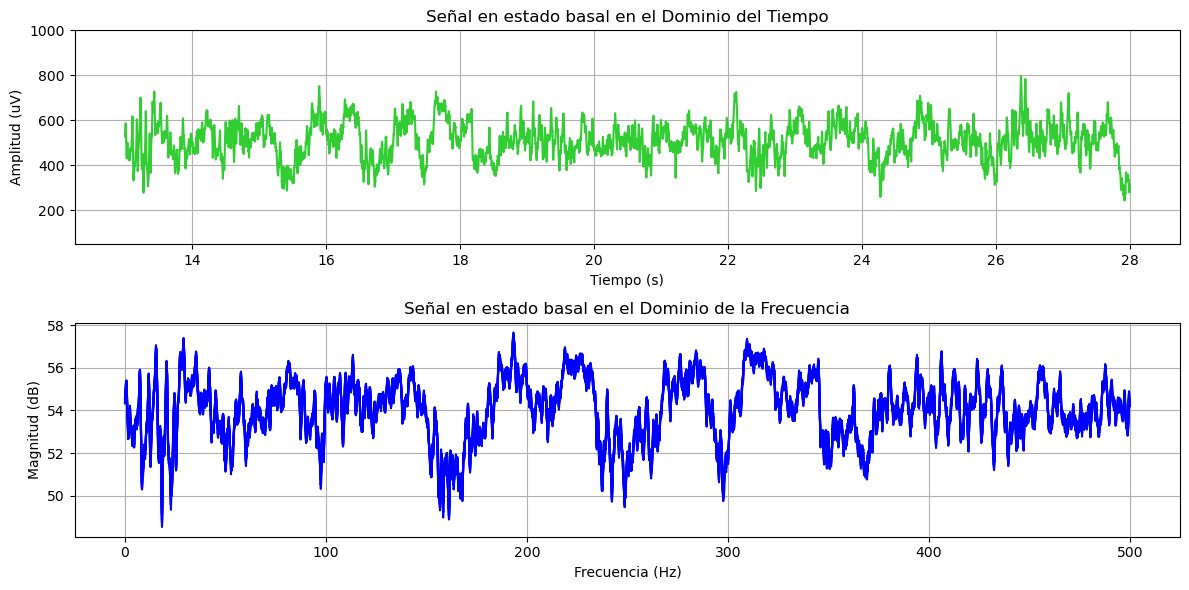

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Cargar los datos
# Cambia esta línea si el archivo tiene otro formato (espacios, comas, etc.)
data = np.loadtxt('C:/Users/user/Desktop/Signals/EEG_signals/sinpensar_rodrigo.txt')  # Asumimos que cada línea es un valor de la señal
sampling_rate = 1000  # Frecuencia de muestreo en Hz (extraída de la imagen: 1000 Hz)


# Definir el tiempo total del archivo en segundos
total_time = len(data) / sampling_rate

# Definir los segundos para la ventana de interés (segundos 18 a 28)
start_time = 13
end_time = 28

# Convertir el tiempo a índices
start_index = int(start_time * sampling_rate)
end_index = int(end_time * sampling_rate)

# Recortar los datos
signal_segment = data[start_index:end_index]
time_segment = np.linspace(start_time, end_time, len(signal_segment))

# Graficar la señal en el dominio del tiempo
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(time_segment, signal_segment, color='limegreen')
plt.title('Señal en estado basal en el Dominio del Tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (uV)')
plt.ylim(50, 1000)  # Limitar la amplitud de -100 a 100
plt.grid(True)

# Transformada de Fourier para el dominio de la frecuencia
n = len(signal_segment)
yf = fft(signal_segment)
xf = fftfreq(n, 1 / sampling_rate)

# Solo usar la parte positiva de la frecuencia
xf = xf[:n // 2]
yf = np.abs(yf[:n // 2])

# Convertir la magnitud a decibelios
yf_db = 20 * np.log10(yf)

# Graficar la señal en el dominio de la frecuencia en decibelios
plt.subplot(2, 1, 2)
plt.plot(xf, yf_db, color='blue')
plt.title('Señal en estado basal en el Dominio de la Frecuencia')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud (dB)')
plt.grid(True)

# Mostrar las gráficas
plt.tight_layout()
plt.show()


OJOS ABIERTOS - OJOS CERRADO

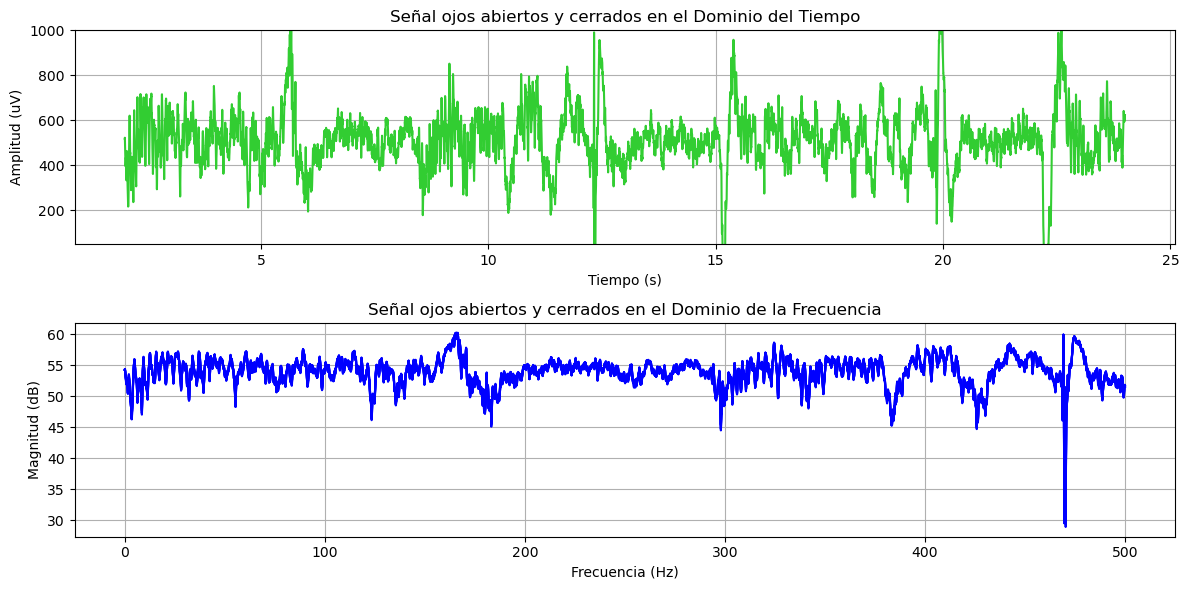

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Cargar los datos
# Cambia esta línea si el archivo tiene otro formato (espacios, comas, etc.)
data = np.loadtxt('C:/Users/user/Desktop/Signals/EEG_signals/ojosabiertosycerrados_rodrigo.txt')  # Asumimos que cada línea es un valor de la señal
sampling_rate = 1000  # Frecuencia de muestreo en Hz (extraída de la imagen: 1000 Hz)


# Definir el tiempo total del archivo en segundos
total_time = len(data) / sampling_rate

# Definir los segundos para la ventana de interés (segundos 18 a 28)
start_time = 2
end_time = 24

# Convertir el tiempo a índices
start_index = int(start_time * sampling_rate)
end_index = int(end_time * sampling_rate)

# Recortar los datos
signal_segment = data[start_index:end_index]
time_segment = np.linspace(start_time, end_time, len(signal_segment))

# Graficar la señal en el dominio del tiempo
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(time_segment, signal_segment, color='limegreen')
plt.title('Señal ojos abiertos y cerrados en el Dominio del Tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (uV)')
plt.ylim(50, 1000)  # Limitar la amplitud de -100 a 100
plt.grid(True)

# Transformada de Fourier para el dominio de la frecuencia
n = len(signal_segment)
yf = fft(signal_segment)
xf = fftfreq(n, 1 / sampling_rate)

# Solo usar la parte positiva de la frecuencia
xf = xf[:n // 2]
yf = np.abs(yf[:n // 2])

# Convertir la magnitud a decibelios
yf_db = 20 * np.log10(yf)

# Graficar la señal en el dominio de la frecuencia en decibelios
plt.subplot(2, 1, 2)
plt.plot(xf, yf_db, color='blue')
plt.title('Señal ojos abiertos y cerrados en el Dominio de la Frecuencia')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud (dB)')
plt.grid(True)

# Mostrar las gráficas
plt.tight_layout()
plt.show()


otra fase de referencia 

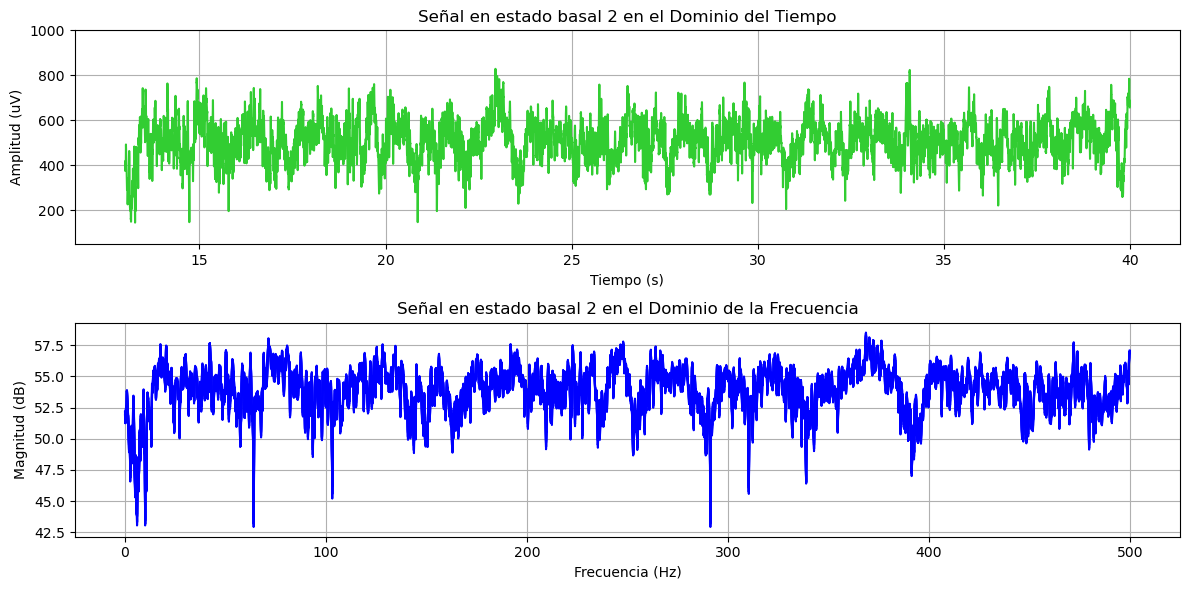

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Cargar los datos
# Cambia esta línea si el archivo tiene otro formato (espacios, comas, etc.)
data = np.loadtxt('C:/Users/user/Desktop/Signals/EEG_signals/fasereposo2.txt')  # Asumimos que cada línea es un valor de la señal
sampling_rate = 1000  # Frecuencia de muestreo en Hz (extraída de la imagen: 1000 Hz)


# Definir el tiempo total del archivo en segundos
total_time = len(data) / sampling_rate

# Definir los segundos para la ventana de interés (segundos 18 a 28)
start_time = 13
end_time = 40

# Convertir el tiempo a índices
start_index = int(start_time * sampling_rate)
end_index = int(end_time * sampling_rate)

# Recortar los datos
signal_segment = data[start_index:end_index]
time_segment = np.linspace(start_time, end_time, len(signal_segment))

# Graficar la señal en el dominio del tiempo
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(time_segment, signal_segment, color='limegreen')
plt.title('Señal en estado basal 2 en el Dominio del Tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (uV)')
plt.ylim(50, 1000)  # Limitar la amplitud 
plt.grid(True)

# Transformada de Fourier para el dominio de la frecuencia
n = len(signal_segment)
yf = fft(signal_segment)
xf = fftfreq(n, 1 / sampling_rate)

# Solo usar la parte positiva de la frecuencia
xf = xf[:n // 2]
yf = np.abs(yf[:n // 2])

# Convertir la magnitud a decibelios
yf_db = 20 * np.log10(yf)

# Graficar la señal en el dominio de la frecuencia en decibelios
plt.subplot(2, 1, 2)
plt.plot(xf, yf_db, color='blue')
plt.title('Señal en estado basal 2 en el Dominio de la Frecuencia')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud (dB)')
plt.grid(True)

# Mostrar las gráficas
plt.tight_layout()
plt.show()


ejercicios matemáticos

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Cargar los datos
# Cambia esta línea si el archivo tiene otro formato (espacios, comas, etc.)
data = np.loadtxt('C:/Users/user/Desktop/Signals/EEG_signals/fasereposo2.txt')  # Asumimos que cada línea es un valor de la señal
sampling_rate = 1000  # Frecuencia de muestreo en Hz (extraída de la imagen: 1000 Hz)


# Definir el tiempo total del archivo en segundos
total_time = len(data) / sampling_rate

# Definir los segundos para la ventana de interés (segundos 18 a 28)
start_time = 13
end_time = 40

# Convertir el tiempo a índices
start_index = int(start_time * sampling_rate)
end_index = int(end_time * sampling_rate)

# Recortar los datos
signal_segment = data[start_index:end_index]
time_segment = np.linspace(start_time, end_time, len(signal_segment))

# Graficar la señal en el dominio del tiempo
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(time_segment, signal_segment, color='limegreen')
plt.title('Señal en estado basal 2 en el Dominio del Tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (uV)')
plt.ylim(50, 1000)  # Limitar la amplitud 
plt.grid(True)

# Transformada de Fourier para el dominio de la frecuencia
n = len(signal_segment)
yf = fft(signal_segment)
xf = fftfreq(n, 1 / sampling_rate)

# Solo usar la parte positiva de la frecuencia
xf = xf[:n // 2]
yf = np.abs(yf[:n // 2])

# Convertir la magnitud a decibelios
yf_db = 20 * np.log10(yf)

# Graficar la señal en el dominio de la frecuencia en decibelios
plt.subplot(2, 1, 2)
plt.plot(xf, yf_db, color='blue')
plt.title('Señal en estado basal 2 en el Dominio de la Frecuencia')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud (dB)')
plt.grid(True)

# Mostrar las gráficas
plt.tight_layout()
plt.show()


* FÁCILES

C:\Users\user\AppData\Local\Temp\ipykernel_22080\3092020832.py:47: RuntimeWarning: divide by zero encountered in log10
  yf_db = 20 * np.log10(yf)


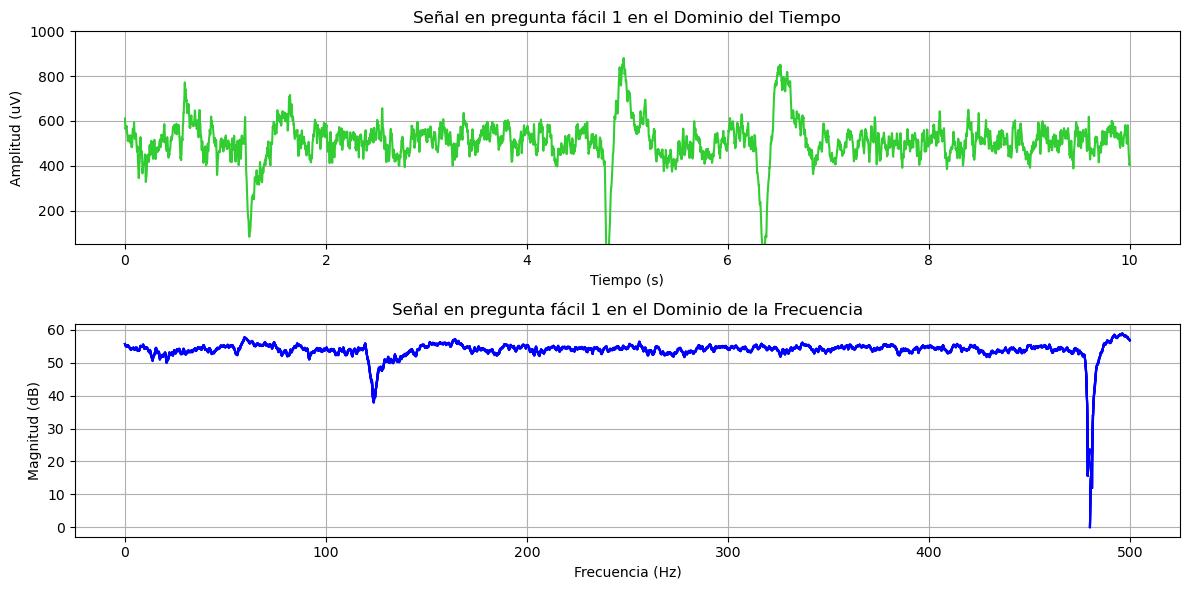

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Cargar los datos
# Cambia esta línea si el archivo tiene otro formato (espacios, comas, etc.)
data = np.loadtxt('C:/Users/user/Desktop/Signals/EEG_signals/preguntafacil1.txt')  # Asumimos que cada línea es un valor de la señal
sampling_rate = 1000  # Frecuencia de muestreo en Hz (extraída de la imagen: 1000 Hz)


# Definir el tiempo total del archivo en segundos
total_time = len(data) / sampling_rate

# Definir los segundos para la ventana de interés (segundos 18 a 28)
start_time = 0
end_time = 10

# Convertir el tiempo a índices
start_index = int(start_time * sampling_rate)
end_index = int(end_time * sampling_rate)

# Recortar los datos
signal_segment = data[start_index:end_index]
time_segment = np.linspace(start_time, end_time, len(signal_segment))

# Graficar la señal en el dominio del tiempo
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(time_segment, signal_segment, color='limegreen')
plt.title('Señal en pregunta fácil 1 en el Dominio del Tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (uV)')
plt.ylim(50, 1000)  # Limitar la amplitud 
plt.grid(True)

# Transformada de Fourier para el dominio de la frecuencia
n = len(signal_segment)
yf = fft(signal_segment)
xf = fftfreq(n, 1 / sampling_rate)

# Solo usar la parte positiva de la frecuencia
xf = xf[:n // 2]
yf = np.abs(yf[:n // 2])

# Convertir la magnitud a decibelios
yf_db = 20 * np.log10(yf)

# Graficar la señal en el dominio de la frecuencia en decibelios
plt.subplot(2, 1, 2)
plt.plot(xf, yf_db, color='blue')
plt.title('Señal en pregunta fácil 1 en el Dominio de la Frecuencia')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud (dB)')
plt.grid(True)

# Mostrar las gráficas
plt.tight_layout()
plt.show()


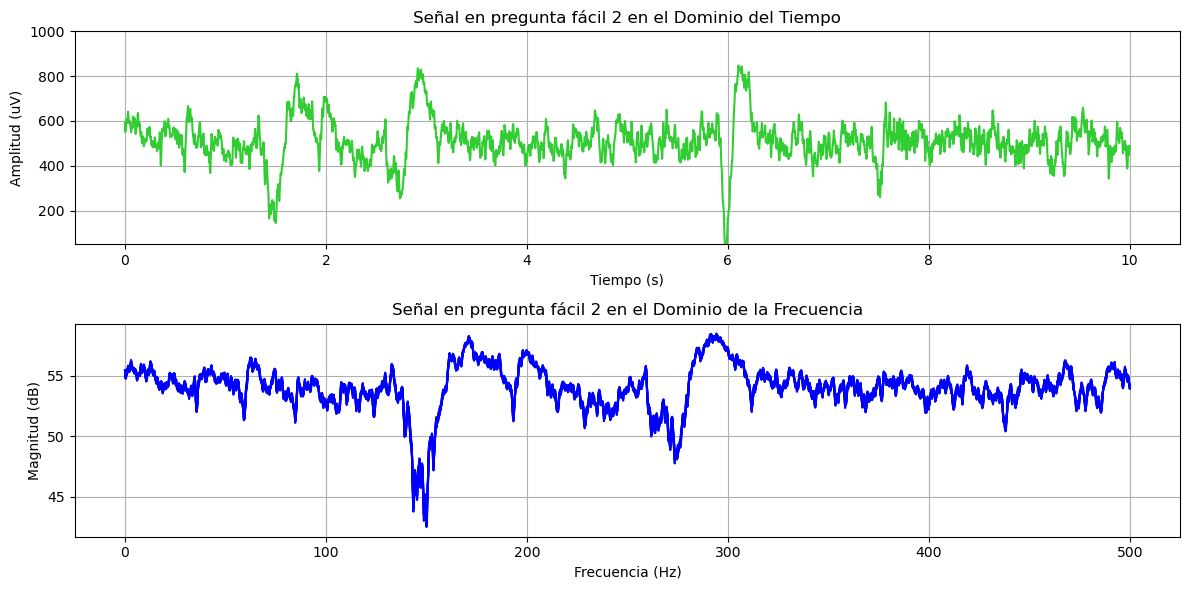

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Cargar los datos
# Cambia esta línea si el archivo tiene otro formato (espacios, comas, etc.)
data = np.loadtxt('C:/Users/user/Desktop/Signals/EEG_signals/preguntafacil2.txt')  # Asumimos que cada línea es un valor de la señal
sampling_rate = 1000  # Frecuencia de muestreo en Hz (extraída de la imagen: 1000 Hz)


# Definir el tiempo total del archivo en segundos
total_time = len(data) / sampling_rate

# Definir los segundos para la ventana de interés (segundos 18 a 28)
start_time = 0
end_time = 10

# Convertir el tiempo a índices
start_index = int(start_time * sampling_rate)
end_index = int(end_time * sampling_rate)

# Recortar los datos
signal_segment = data[start_index:end_index]
time_segment = np.linspace(start_time, end_time, len(signal_segment))

# Graficar la señal en el dominio del tiempo
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(time_segment, signal_segment, color='limegreen')
plt.title('Señal en pregunta fácil 2 en el Dominio del Tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (uV)')
plt.ylim(50, 1000)  # Limitar la amplitud 
plt.grid(True)

# Transformada de Fourier para el dominio de la frecuencia
n = len(signal_segment)
yf = fft(signal_segment)
xf = fftfreq(n, 1 / sampling_rate)

# Solo usar la parte positiva de la frecuencia
xf = xf[:n // 2]
yf = np.abs(yf[:n // 2])

# Convertir la magnitud a decibelios
yf_db = 20 * np.log10(yf)

# Graficar la señal en el dominio de la frecuencia en decibelios
plt.subplot(2, 1, 2)
plt.plot(xf, yf_db, color='blue')
plt.title('Señal en pregunta fácil 2 en el Dominio de la Frecuencia')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud (dB)')
plt.grid(True)

# Mostrar las gráficas
plt.tight_layout()
plt.show()


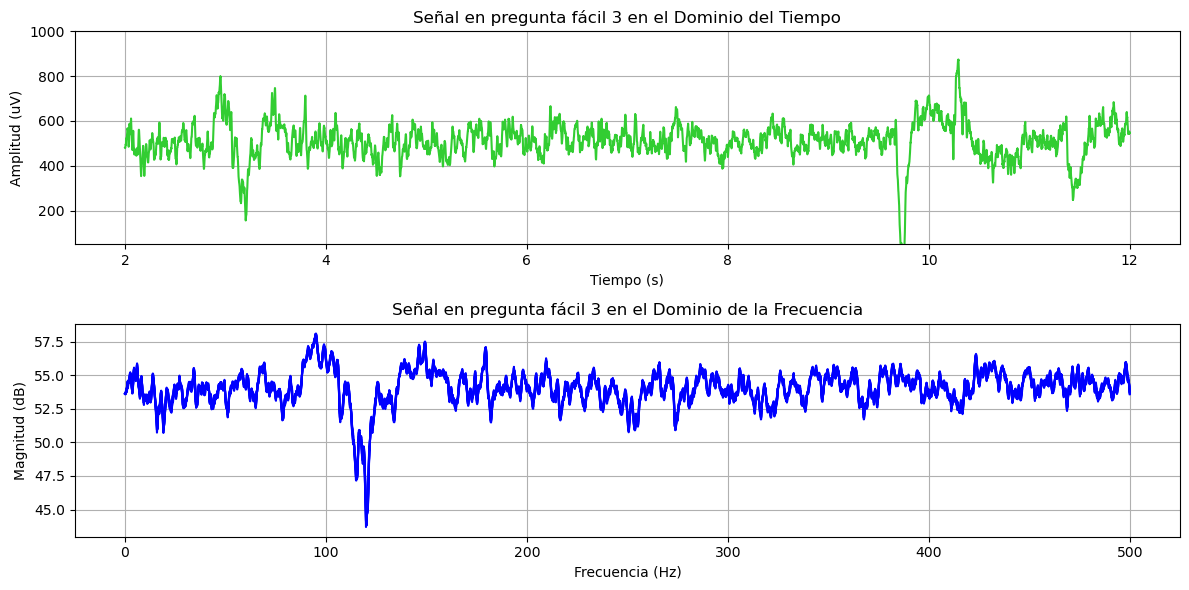

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Cargar los datos
# Cambia esta línea si el archivo tiene otro formato (espacios, comas, etc.)
data = np.loadtxt('C:/Users/user/Desktop/Signals/EEG_signals/preguntafacil3.txt')  # Asumimos que cada línea es un valor de la señal
sampling_rate = 1000  # Frecuencia de muestreo en Hz (extraída de la imagen: 1000 Hz)


# Definir el tiempo total del archivo en segundos
total_time = len(data) / sampling_rate

# Definir los segundos para la ventana de interés (segundos 18 a 28)
start_time = 2
end_time = 12

# Convertir el tiempo a índices
start_index = int(start_time * sampling_rate)
end_index = int(end_time * sampling_rate)

# Recortar los datos
signal_segment = data[start_index:end_index]
time_segment = np.linspace(start_time, end_time, len(signal_segment))

# Graficar la señal en el dominio del tiempo
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(time_segment, signal_segment, color='limegreen')
plt.title('Señal en pregunta fácil 3 en el Dominio del Tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (uV)')
plt.ylim(50, 1000)  # Limitar la amplitud 
plt.grid(True)

# Transformada de Fourier para el dominio de la frecuencia
n = len(signal_segment)
yf = fft(signal_segment)
xf = fftfreq(n, 1 / sampling_rate)

# Solo usar la parte positiva de la frecuencia
xf = xf[:n // 2]
yf = np.abs(yf[:n // 2])

# Convertir la magnitud a decibelios
yf_db = 20 * np.log10(yf)

# Graficar la señal en el dominio de la frecuencia en decibelios
plt.subplot(2, 1, 2)
plt.plot(xf, yf_db, color='blue')
plt.title('Señal en pregunta fácil 3 en el Dominio de la Frecuencia')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud (dB)')
plt.grid(True)

# Mostrar las gráficas
plt.tight_layout()
plt.show()


* DÍFICILES

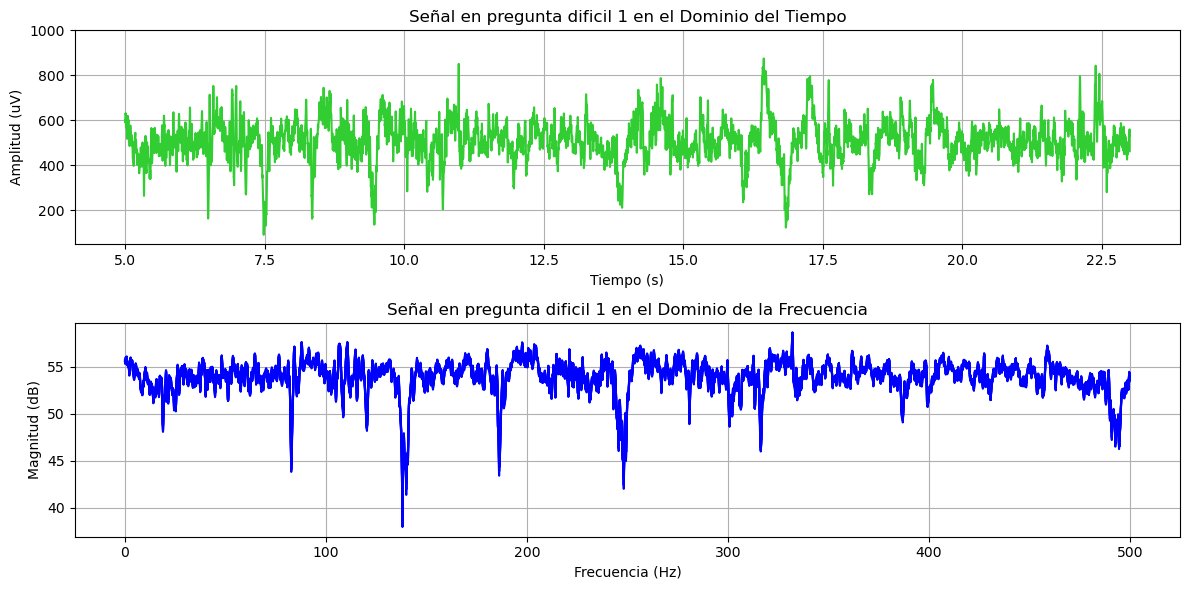

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Cargar los datos
# Cambia esta línea si el archivo tiene otro formato (espacios, comas, etc.)
data = np.loadtxt('C:/Users/user/Desktop/Signals/EEG_signals/pregunta_tuti.txt')  # Asumimos que cada línea es un valor de la señal
sampling_rate = 1000  # Frecuencia de muestreo en Hz (extraída de la imagen: 1000 Hz)


# Definir el tiempo total del archivo en segundos
total_time = len(data) / sampling_rate

# Definir los segundos para la ventana de interés (segundos 18 a 28)
start_time = 5
end_time = 23

# Convertir el tiempo a índices
start_index = int(start_time * sampling_rate)
end_index = int(end_time * sampling_rate)

# Recortar los datos
signal_segment = data[start_index:end_index]
time_segment = np.linspace(start_time, end_time, len(signal_segment))

# Graficar la señal en el dominio del tiempo
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(time_segment, signal_segment, color='limegreen')
plt.title('Señal en pregunta dificil 1 en el Dominio del Tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (uV)')
plt.ylim(50, 1000)  # Limitar la amplitud 
plt.grid(True)

# Transformada de Fourier para el dominio de la frecuencia
n = len(signal_segment)
yf = fft(signal_segment)
xf = fftfreq(n, 1 / sampling_rate)

# Solo usar la parte positiva de la frecuencia
xf = xf[:n // 2]
yf = np.abs(yf[:n // 2])

# Convertir la magnitud a decibelios
yf_db = 20 * np.log10(yf)

# Graficar la señal en el dominio de la frecuencia en decibelios
plt.subplot(2, 1, 2)
plt.plot(xf, yf_db, color='blue')
plt.title('Señal en pregunta dificil 1 en el Dominio de la Frecuencia')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud (dB)')
plt.grid(True)

# Mostrar las gráficas
plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_22080\1765245481.py:47: RuntimeWarning: divide by zero encountered in log10
  yf_db = 20 * np.log10(yf)


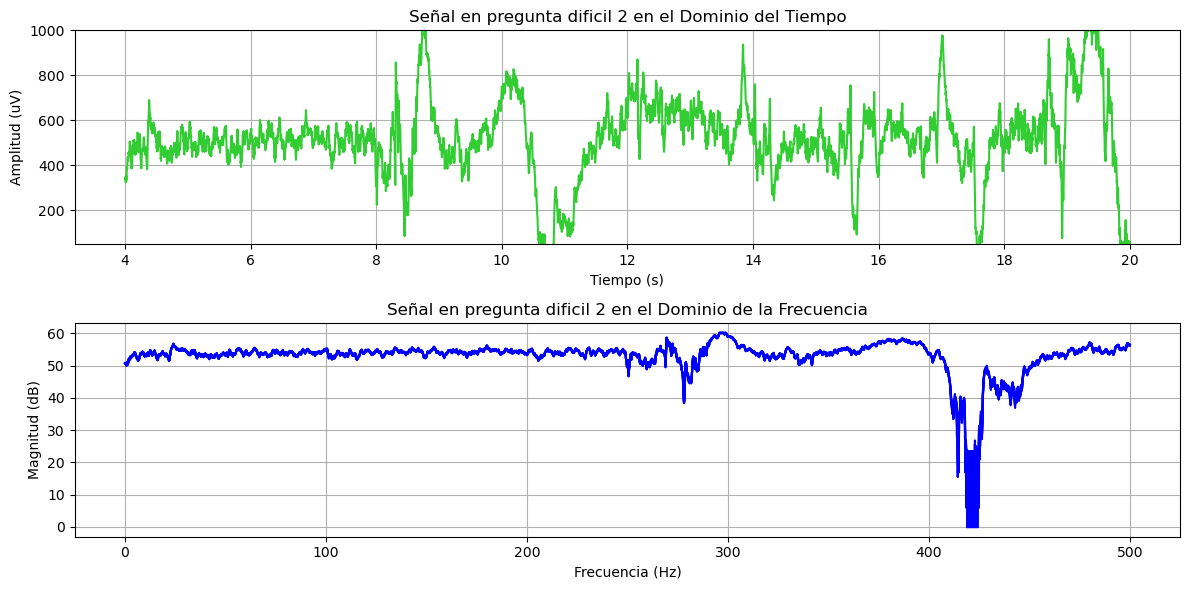

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Cargar los datos
# Cambia esta línea si el archivo tiene otro formato (espacios, comas, etc.)
data = np.loadtxt('C:/Users/user/Desktop/Signals/EEG_signals/preguntadificil1.txt')  # Asumimos que cada línea es un valor de la señal
sampling_rate = 1000  # Frecuencia de muestreo en Hz (extraída de la imagen: 1000 Hz)


# Definir el tiempo total del archivo en segundos
total_time = len(data) / sampling_rate

# Definir los segundos para la ventana de interés (segundos 18 a 28)
start_time = 4
end_time = 20

# Convertir el tiempo a índices
start_index = int(start_time * sampling_rate)
end_index = int(end_time * sampling_rate)

# Recortar los datos
signal_segment = data[start_index:end_index]
time_segment = np.linspace(start_time, end_time, len(signal_segment))

# Graficar la señal en el dominio del tiempo
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(time_segment, signal_segment, color='limegreen')
plt.title('Señal en pregunta dificil 2 en el Dominio del Tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (uV)')
plt.ylim(50, 1000)  # Limitar la amplitud 
plt.grid(True)

# Transformada de Fourier para el dominio de la frecuencia
n = len(signal_segment)
yf = fft(signal_segment)
xf = fftfreq(n, 1 / sampling_rate)

# Solo usar la parte positiva de la frecuencia
xf = xf[:n // 2]
yf = np.abs(yf[:n // 2])

# Convertir la magnitud a decibelios
yf_db = 20 * np.log10(yf)

# Graficar la señal en el dominio de la frecuencia en decibelios
plt.subplot(2, 1, 2)
plt.plot(xf, yf_db, color='blue')
plt.title('Señal en pregunta dificil 2 en el Dominio de la Frecuencia')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud (dB)')
plt.grid(True)

# Mostrar las gráficas
plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_22080\3032683042.py:47: RuntimeWarning: divide by zero encountered in log10
  yf_db = 20 * np.log10(yf)


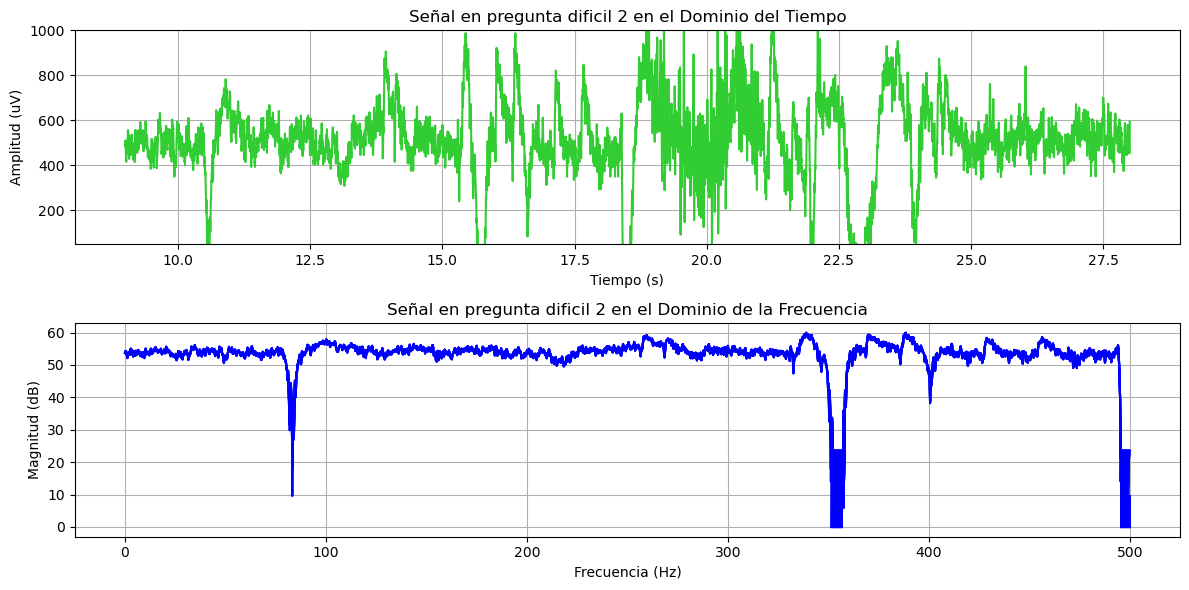

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Cargar los datos
# Cambia esta línea si el archivo tiene otro formato (espacios, comas, etc.)
data = np.loadtxt('C:/Users/user/Desktop/Signals/EEG_signals/preguntadificilmaleada.txt')  # Asumimos que cada línea es un valor de la señal
sampling_rate = 1000  # Frecuencia de muestreo en Hz (extraída de la imagen: 1000 Hz)


# Definir el tiempo total del archivo en segundos
total_time = len(data) / sampling_rate

# Definir los segundos para la ventana de interés (segundos 18 a 28)
start_time = 9
end_time = 28

# Convertir el tiempo a índices
start_index = int(start_time * sampling_rate)
end_index = int(end_time * sampling_rate)

# Recortar los datos
signal_segment = data[start_index:end_index]
time_segment = np.linspace(start_time, end_time, len(signal_segment))

# Graficar la señal en el dominio del tiempo
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(time_segment, signal_segment, color='limegreen')
plt.title('Señal en pregunta dificil 2 en el Dominio del Tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (uV)')
plt.ylim(50, 1000)  # Limitar la amplitud 
plt.grid(True)

# Transformada de Fourier para el dominio de la frecuencia
n = len(signal_segment)
yf = fft(signal_segment)
xf = fftfreq(n, 1 / sampling_rate)

# Solo usar la parte positiva de la frecuencia
xf = xf[:n // 2]
yf = np.abs(yf[:n // 2])

# Convertir la magnitud a decibelios
yf_db = 20 * np.log10(yf)

# Graficar la señal en el dominio de la frecuencia en decibelios
plt.subplot(2, 1, 2)
plt.plot(xf, yf_db, color='blue')
plt.title('Señal en pregunta dificil 2 en el Dominio de la Frecuencia')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud (dB)')
plt.grid(True)

# Mostrar las gráficas
plt.tight_layout()
plt.show()


### **5.3 Archivos** <a name="id8"></a>
- [Documentos (.txt)](https://github.com/DianaCortezL/ISB-Grupo-5/tree/ca2087a1e8c80dfdf1d244956771d8c6e7e543ac/Otros/Archivos%20varios/Lab5_ECG)
- [Programa de ploteo (Jupyter Notebook)](https://github.com/DianaCortezL/ISB-Grupo-5/blob/ca2087a1e8c80dfdf1d244956771d8c6e7e543ac/ISB/Laboratorios/Lab05%20-%20Adquisici%C3%B3n%20de%20se%C3%B1al%20ECG/LabECG.ipynb)

## **6. Conclusiones** <a name="id9"></a>
---


## **7. Recomendaciones** <a name="id10"></a>
---

## **8. Referencias bibliográficas** <a name="id11"></a>
---